# Analyzing the downloaded data

## Assumptions

You have used the `download_stenos.py` and `generate_pandas.py` to download the steno protocols and save them into a compressed pickle.

I have them under ./kk/ folder, you will have to adjust the paths accordingly to your storage location.

In [13]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

df2017 = pd.read_pickle('./kk/psp2017.pkl.xz', compression='xz')
#df2013 = pd.read_pickle('./kk/psp2013_2017.pkl.xz', compression='xz')

df2017.columns

Index(['session', 'date', 'topic_idx', 'topic_str', 'order', 'name',
       'steno_name', 'file_name', 'text', 'tokens', 'age', 'sex', 'titles',
       'party'],
      dtype='object')

The data frame contains interventions in each two and the following columns:
   
   - 'session', 'date', 'topic_idx', 'topic_str', 'order', 
     The session, the date of the session, the topic being discussed, and the order of intervention for the session
   
   - 'name','steno_name', 
     The name of the speacker and the string that appears in the steno protocol
   
       - 'age', 'sex', 'titles','party'
       Information about the speaker
   
   - 'file_name', 'text', 
     The file name that contains the information, and the text in the filed
   
   - 'tokens', 
     The number of tokens on the unfiltered file


We have loaded all the stenos and metadata from the sessions between 2013-2017 in the df2013 data frame and the protocols from 2017 into df2017, the data frames have the following columns.

For 2013-2017 we have 29067 files 

In [8]:
"""print("2017-2017")
print("\tTotal files:  {}".format(df2013["tokens"].count()))
print("\tTotal tokens: {}".format(df2013["tokens"].sum()))
"""

print("2017-")
print("\tTotal files:  {}".format(df2017["tokens"].count()))
print("\tTotal tokens: {}".format(df2017["tokens"].sum()))

2017-
	Total files:  10464
	Total tokens: 2098670


We can see who are the people that have more tokens, for that we will group the data frame by `name` and sum the tokens. Finally we can take the 20 largest.

In [9]:
"""top_n = 20
g_name_2013 = df2013.groupby(["name"])
print("Total number of different speakers: {}\n".format(len(g_name_2013)))
print("Top {} speakers by number of tokens for 2013-2017".format(top_n))
g_name_2013["tokens"].sum().nlargest(top_n)"""

'top_n = 20\ng_name_2013 = df2013.groupby(["name"])\nprint("Total number of different speakers: {}\n".format(len(g_name_2013)))\nprint("Top {} speakers by number of tokens for 2013-2017".format(top_n))\ng_name_2013["tokens"].sum().nlargest(top_n)'

In [15]:
top_n = 50
g_name_2017 = df2017.groupby(["name"])
print("Total number of different speakers: {}\n".format(len(g_name_2017)))

print("Top {} speakers by number of tokens for 2017".format(top_n))
print(g_name_2017["tokens"].sum().nlargest(top_n))



Total number of different speakers: 241

Top 50 speakers by number of tokens for 2017
name
Zbyněk Stanjura             110281
Andrej Babiš                 66463
Martin Kolovratník           64169
Jakub Michálek               56669
Miroslav Kalousek            48733
Alena Schillerová            48348
Adam Vojtěch                 42954
Marek Benda                  40026
Vojtěch Munzar               38385
Tomio Okamura                38073
Mikuláš Ferjenčík            37388
Jan Skopeček                 32153
Marian Jurečka               31657
Ivan Adamec                  29073
Vít Kaňkovský                28603
Leo Luzar                    28205
Marek Výborný                28069
Vojtěch Filip                27434
Markéta Pekarová Adamová     27184
Dan Ťok                      26954
Věra Kovářová                26442
Jan Zahradník                25948
Richard Brabec               24512
Petr Fiala                   23239
Václav Klaus                 22947
Helena Válková               22450

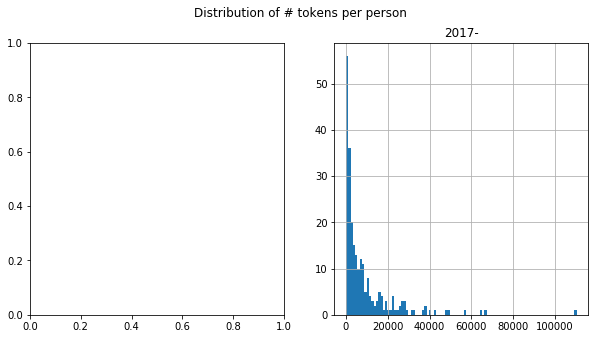

In [11]:
plt.suptitle("Distribution of # tokens per person")
ax1=plt.subplot(121)
#df2013.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
#plt.title("2013-2107")
ax1=plt.subplot(122)
df2017.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
_ = plt.title("2017-")
